In [1]:
%run utils.ipynb

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import f1_score
from time import time
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import cross_val_score
from matplotlib.ticker import MaxNLocator

classifier = MLPClassifier(solver="lbfgs", activation="logistic", hidden_layer_sizes=(40,))

def kmeans_nn(data):
    vals = []
    for n in range(2,data['n_features']+1):
        cluster = KMeans(n_clusters=n, init='k-means++', max_iter = 100, n_init = 10, random_state = 55)
        kmeans = cluster.fit(data['X'])
        clustered_X = kmeans.transform(data['X'])
        X_train, X_test, y_train, y_test = train_test_split(clustered_X, data['y'], test_size=0.2, random_state=111, stratify=data['y'])
        start_time = time()
        _score = np.mean(cross_val_score(classifier, clustered_X, data['y'], scoring='f1_weighted'))
        _time = time() - start_time
        vals.append({
            'mean_fit_time': _time,
            'mean_test_score': _score,
            'n_clusters':n,
        })
    
    df = pd.DataFrame(vals)
    return df

def em_nn(data):
    vals = []
    for n in range(2,data['n_features']+1):
        em = EM(n_components=n,n_init=10,random_state=100)
        em.fit(data['X'])
        sample=em.sample(data['n_samples'])[0]
        clustered_X=np.asarray(sample)
        X_train, X_test, y_train, y_test = train_test_split(clustered_X, data['y'], test_size=0.2, random_state=111, stratify=data['y'])
        start_time = time()
        _score = np.mean(cross_val_score(classifier, clustered_X, data['y'], scoring='f1_weighted'))
        _time = time() - start_time
        vals.append({
            'mean_fit_time': _time,
            'mean_test_score': _score,
            'n_clusters':n,
        })
    
    df = pd.DataFrame(vals)
    return df

data = cdata
df = kmeans_nn(data)
df.to_csv(f"./q5/kmeans_{data['name']}.csv", index=False)
dfm = kmeans_nn(data)
dfm.to_csv(f"./q5/em_{data['name']}.csv", index=False)
          
data = wdata
df = kmeans_nn(data)
df.to_csv(f"./q5/kmeans_{data['name']}.csv", index=False)
dfm = kmeans_nn(data)
dfm.to_csv(f"./q5/em_{data['name']}.csv", index=False)

In [74]:
data = cdata

start_time = time()
_score = np.mean(cross_val_score(classifier, data['X'], data['y'], scoring='f1_weighted'))
_time = time() - start_time

print(f"Time: {_time}")
print(f"Accuracy Score: {_score}")
print(classifier.get_params())

cdata['_time'] = _time
cdata['_score'] = _score

Time: 0.49723196029663086
Accuracy Score: 0.7100209691869442
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [79]:
data = wdata

start_time = time()
_score = np.mean(cross_val_score(classifier, data['X'], data['y'], scoring='f1_weighted'))
_time = time() - start_time

print(f"Time: {_time}")
print(f"Accuracy Score: {_score}")
print(classifier.get_params())

wdata['_time'] = _time
wdata['_score'] = _score

Time: 2.338456869125366
Accuracy Score: 0.49744140152510047
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<IPython.core.display.Javascript object>


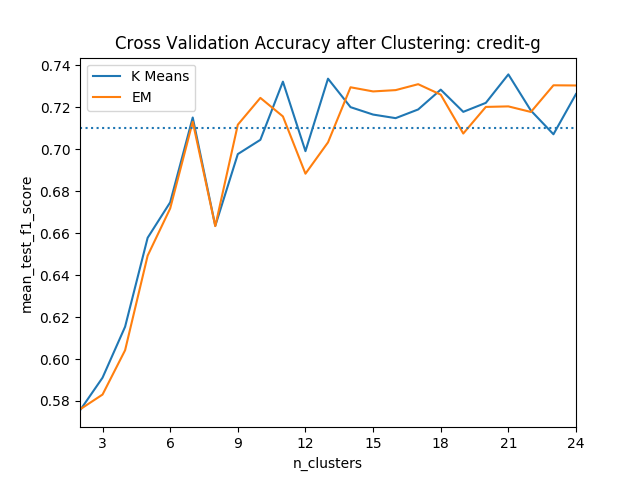

<IPython.core.display.Javascript object>


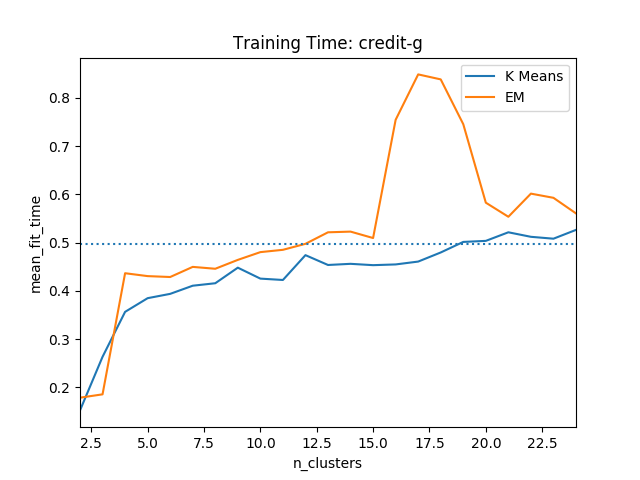

In [100]:
data = cdata

df_kmeans = pd.read_csv(f"./q5/kmeans_{data['name']}.csv")
df_em = pd.read_csv(f"./q5/em_{data['name']}.csv")

from matplotlib.ticker import MaxNLocator
fig, ax1 = plt.subplots()
df_kmeans.plot(x='n_clusters', y='mean_test_score',label='K Means',ax=ax1)
df_em.plot(x='n_clusters', y='mean_test_score',label='EM',ax=ax1)
ax1.axhline(y=data['_score'], linestyle=':')
ax1.set_ylabel("mean_test_f1_score")
ax1.set_title(f"Cross Validation Accuracy after Clustering: {data['name']}")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
              
fig, ax2 = plt.subplots()
df_kmeans.plot(x='n_clusters', y='mean_fit_time',label='K Means',ax=ax2)
df_em.plot(x='n_clusters', y='mean_fit_time',label='EM',ax=ax2)
ax2.axhline(y=data['_time'], linestyle=':')
ax2.set_ylabel("mean_fit_time")
ax2.set_title(f"Training Time: {data['name']}")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

<IPython.core.display.Javascript object>


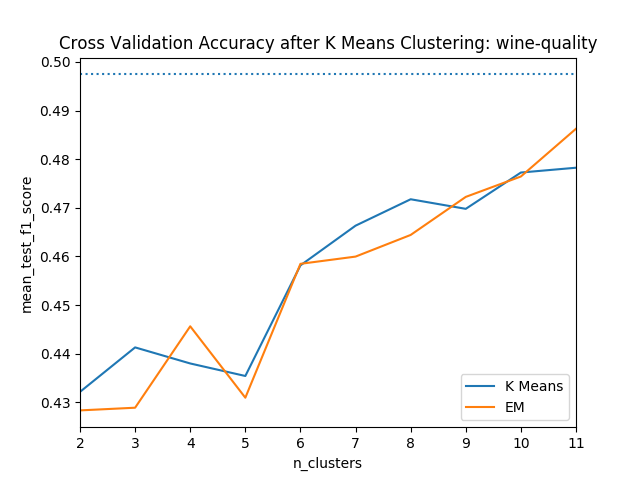

<IPython.core.display.Javascript object>


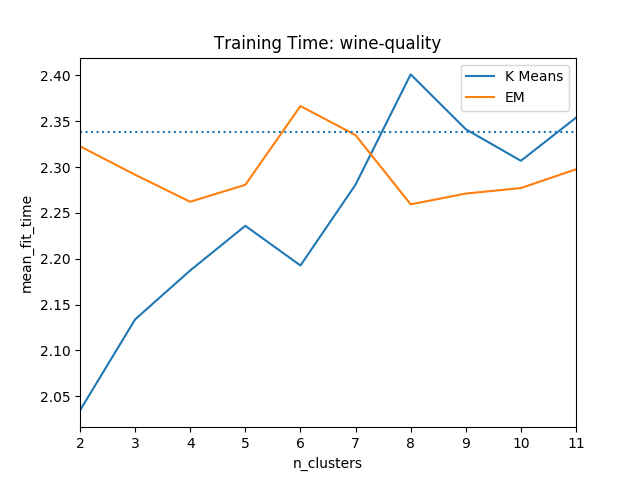

In [97]:
data = wdata

df_kmeans = pd.read_csv(f"./q5/kmeans_{data['name']}.csv")
df_em = pd.read_csv(f"./q5/em_{data['name']}.csv")

from matplotlib.ticker import MaxNLocator
fig, ax1 = plt.subplots()
df_kmeans.plot(x='n_clusters', y='mean_test_score',label='K Means',ax=ax1)
df_em.plot(x='n_clusters', y='mean_test_score',label='EM',ax=ax1)
ax1.axhline(y=data['_score'], linestyle=':')
ax1.set_ylabel("mean_test_f1_score")
ax1.set_title(f"Cross Validation Accuracy after K Means Clustering: {data['name']}")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()
              
fig, ax2 = plt.subplots()
df_kmeans.plot(x='n_clusters', y='mean_fit_time',label='K Means',ax=ax2)
df_em.plot(x='n_clusters', y='mean_fit_time',label='EM',ax=ax2)
ax2.axhline(y=data['_time'], linestyle=':')
ax2.set_ylabel("mean_fit_time")
ax2.set_title(f"Training Time: {data['name']}")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()